In [1]:
import pandas as pd
import numpy as np

In [2]:
import json
from functools import reduce
import matplotlib.pyplot as plt

# Domestic

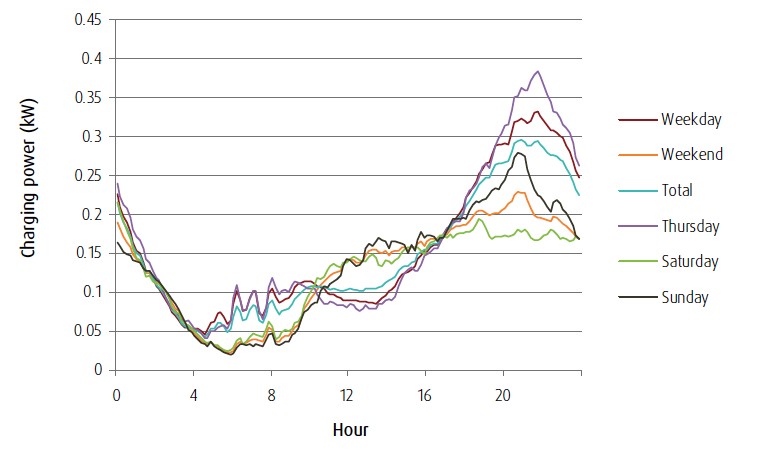

### Extract from plots

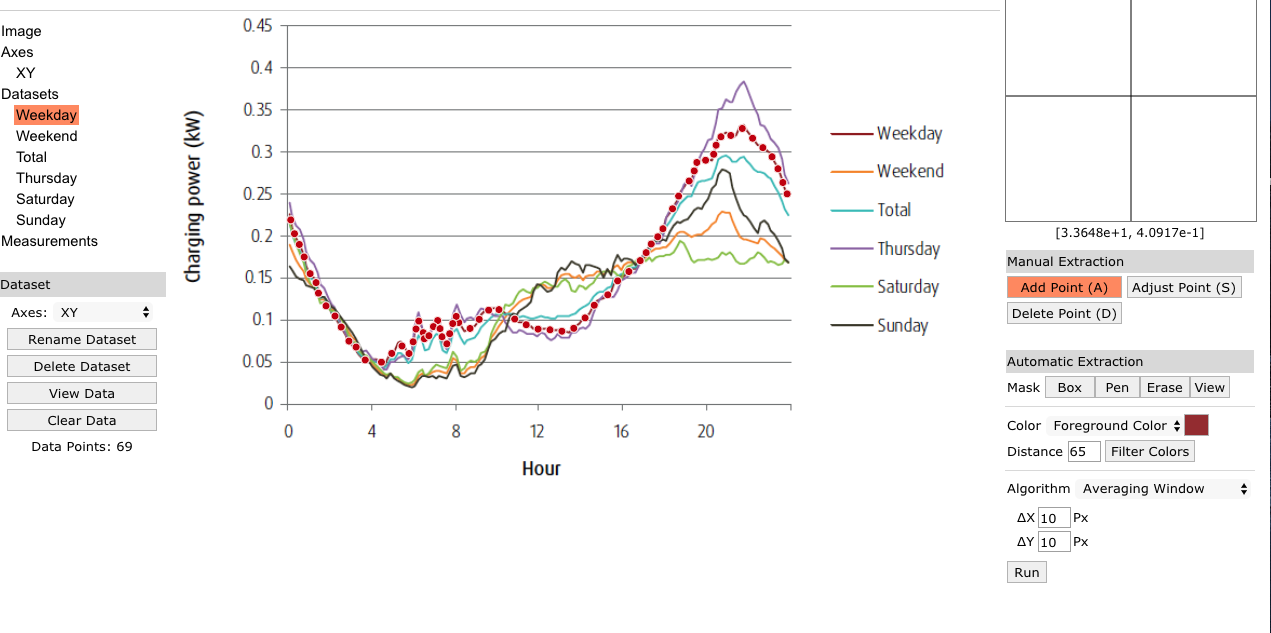

In [3]:
with open('domestic.json') as json_file:
    data = json.load(json_file)

In [4]:
data.keys()

dict_keys(['version', 'axesColl', 'datasetColl', 'measurementColl'])

In [5]:
data['datasetColl'][0].keys()

dict_keys(['name', 'axesName', 'metadataKeys', 'data', 'autoDetectionData'])

In [6]:
data['datasetColl'][0]['name']

'Weekday'

In [7]:
data['datasetColl'][0]['data'][0]

{'x': 114.5,
 'y': 193.33333333333334,
 'value': [0.15965132582903063, 0.21949266686620772]}

In [8]:
rv = {}
points = []
for point in data['datasetColl'][1]['data']:
#     print(point['value'])
    x, y = point['value']
#     print(x, y)
    points.append(point['value'])

In [9]:
rv = {}
for dataset in data['datasetColl']:
    name = dataset['name']
    points = []
    for point in dataset['data']:
        points.append(point['value'])
    rv[name] = points

In [10]:
rv.keys()

dict_keys(['Weekday', 'Weekend', 'Total', 'Thursday', 'Saturday', 'Sunday'])

In [11]:
all_df = []
for name, data in rv.items():
    df = pd.DataFrame(data, columns=['hour', name])
    df = df.set_index('hour')
    df = df[ ~df.index.duplicated() ]
    df =  ( df.reindex(
            df.index.unique().union( range(0,25) ) )
            .interpolate()
            .reindex( range(0,25) , )
          )
    all_df.append(df)
#     df.plot()
#     break

In [12]:
all_df = reduce( lambda df1, df2: pd.merge(
                    df1, df2,
                    left_index=True, right_index=True),
                    all_df )
all_df.head()

,Weekday,Weekend,Total,Thursday,Saturday,Sunday
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.165638,0.148716,0.157203,0.175538,0.155097,0.141089
2,0.111480,0.117483,0.113130,0.121061,0.113239,0.116447
3,0.072106,0.078521,0.083315,0.074569,0.085323,0.087809
4,0.051975,0.060052,0.055925,0.061452,0.057514,0.044805


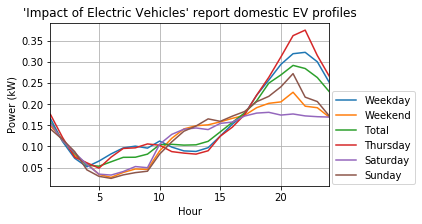

In [13]:
ax = ( all_df.plot(title='\'Impact of Electric Vehicles\' report domestic EV profiles',
                   grid=True,
                   figsize=(5,3)) )
ax.legend(loc=(1.01, 0.01))
ax.set_xlim( (1,24) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [14]:
all_df = all_df.dropna(how='all')

In [15]:
len(all_df)

24

In [16]:
week_days = np.tile(all_df.Weekday, 5)
weekend_days = np.tile(all_df.Weekend, 2)
one_week = np.concatenate([week_days, weekend_days])
one_year = np.tile(one_week, 52)

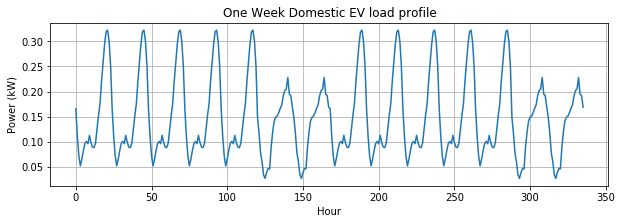

In [17]:
ax = ( pd.Series(one_year)[:24*14].plot(title='One Week Domestic EV load profile',
                   grid=True,
                   figsize=(10,3)) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [18]:
domestic = one_year

# Commercial

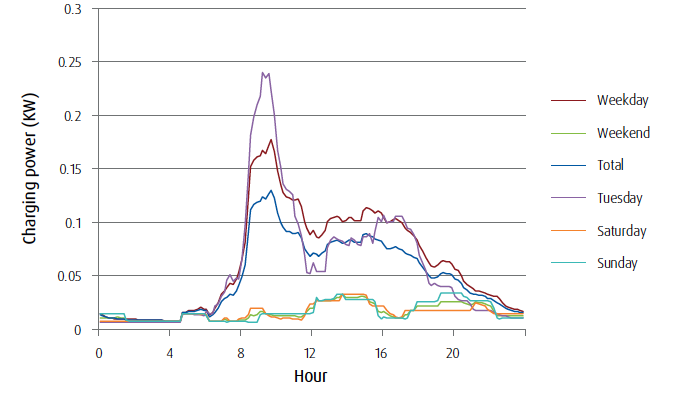

### Extract from plots

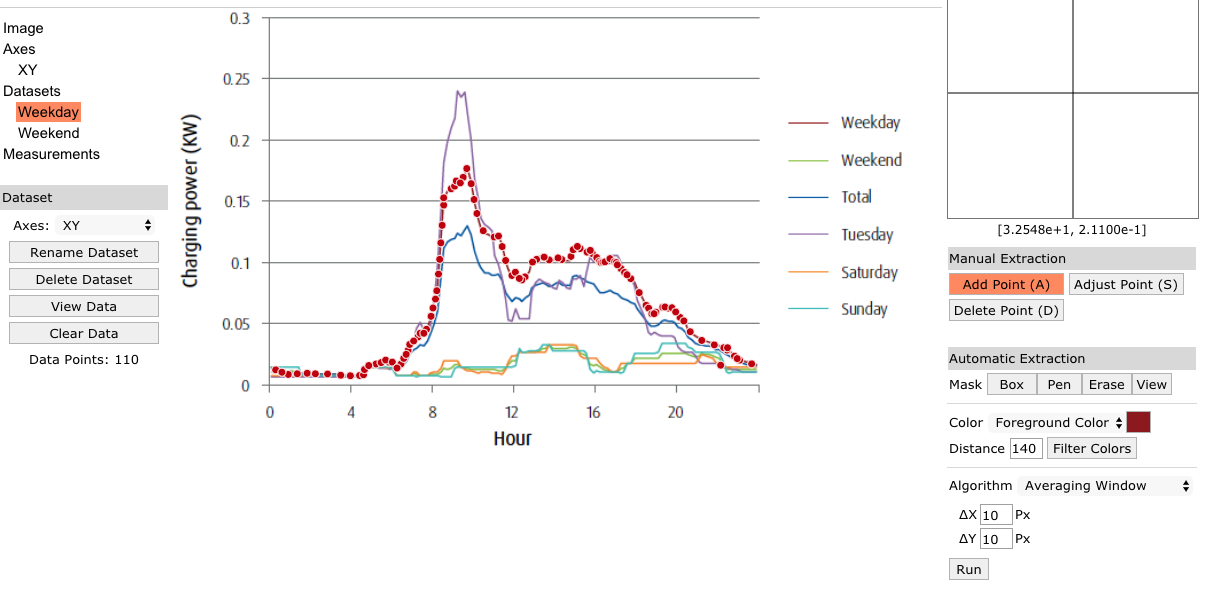

In [19]:
with open('commercial.json') as json_file:
    data = json.load(json_file)

In [20]:
rv = {}
for dataset in data['datasetColl']:
    name = dataset['name']
    points = []
    for point in dataset['data']:
        points.append(point['value'])
    rv[name] = points

In [21]:
rv.keys()

dict_keys(['Weekday', 'Weekend'])

In [22]:
all_df = []
for name, data in rv.items():
    df = pd.DataFrame(data, columns=['hour', name])
    df = df.set_index('hour')
    df = df[ ~df.index.duplicated() ]
    df =  ( df.reindex(
            df.index.unique().union( range(0,25) ) )
            .interpolate()
            .reindex( range(0,25) , )
          )
    all_df.append(df)
#     df.plot()
#     break

In [23]:
all_df = reduce( lambda df1, df2: pd.merge(
                    df1, df2,
                    left_index=True, right_index=True),
                    all_df )
all_df.head()

,Weekday,Weekend
0,NaN,NaN
1,0.009463,0.011310
2,0.009931,0.007305
3,0.009038,0.007593
4,0.008229,0.007919


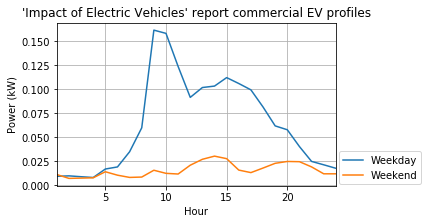

In [24]:
ax = ( all_df.plot(title='\'Impact of Electric Vehicles\' report commercial EV profiles',
                   grid=True,
                   figsize=(5,3)) )
ax.legend(loc=(1.01, 0.01))
ax.set_xlim( (1,24) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [25]:
all_df = all_df.dropna(how='all')

In [26]:
len(all_df)

24

In [27]:
week_days = np.tile(all_df.Weekday, 5)
weekend_days = np.tile(all_df.Weekend, 2)
one_week = np.concatenate([week_days, weekend_days])
one_year = np.tile(one_week, 52)

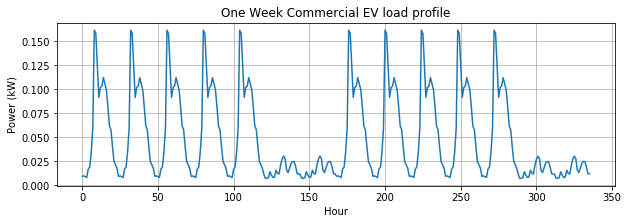

In [28]:
ax = ( pd.Series(one_year)[:24*14].plot(title='One Week Commercial EV load profile',
                   grid=True,
                   figsize=(10,3)) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [29]:
commercial = one_year

# Delivery Vans

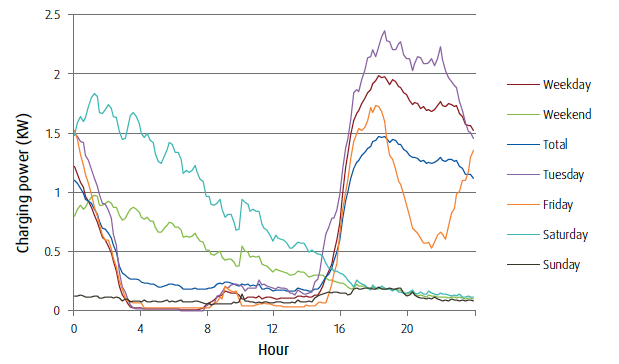

### Extract from plots

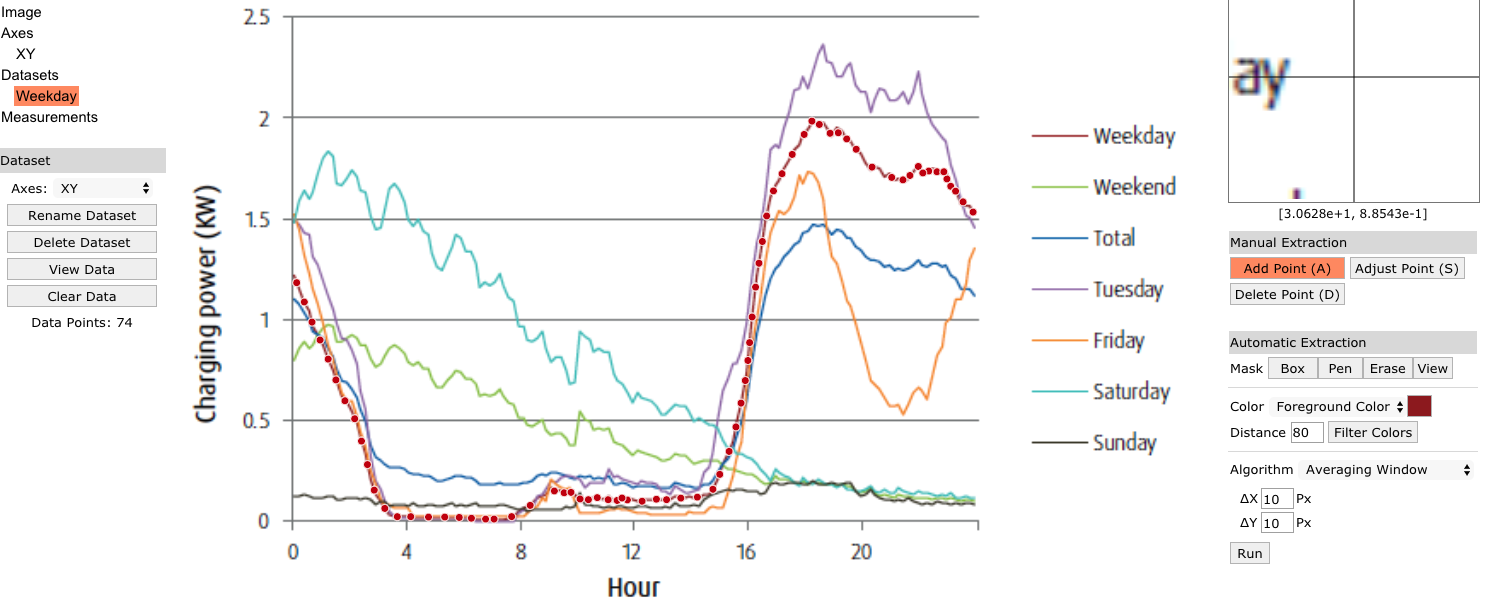

In [30]:
with open('delivery_vans.json') as json_file:
    data = json.load(json_file)

In [31]:
rv = {}
for dataset in data['datasetColl']:
    name = dataset['name']
    points = []
    for point in dataset['data']:
        points.append(point['value'])
    rv[name] = points

In [32]:
rv.keys()

dict_keys(['Weekday', 'Weekend'])

In [33]:
all_df = []
for name, data in rv.items():
    df = pd.DataFrame(data, columns=['hour', name])
    df = df.set_index('hour')
    df = df[ ~df.index.duplicated() ]
    df =  ( df.reindex(
            df.index.unique().union( range(0,25) ) )
            .interpolate()
            .reindex( range(0,25) , )
          )
    all_df.append(df)
#     df.plot()
#     break

In [34]:
all_df = reduce( lambda df1, df2: pd.merge(
                    df1, df2,
                    left_index=True, right_index=True),
                    all_df )
all_df.head()

,Weekday,Weekend
0,NaN,NaN
1,0.852861,0.925866
2,0.554756,0.919435
3,0.110974,0.820042
4,0.024958,0.807594


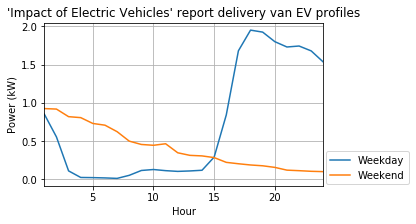

In [35]:
ax = ( all_df.plot(title='\'Impact of Electric Vehicles\' report delivery van EV profiles',
                   grid=True,
                   figsize=(5,3)) )
ax.legend(loc=(1.01, 0.01))
ax.set_xlim( (1,24) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [36]:
all_df = all_df.dropna(how='all')

In [37]:
len(all_df)

24

In [38]:
week_days = np.tile(all_df.Weekday, 5)
weekend_days = np.tile(all_df.Weekend, 2)
one_week = np.concatenate([week_days, weekend_days])
one_year = np.tile(one_week, 52)

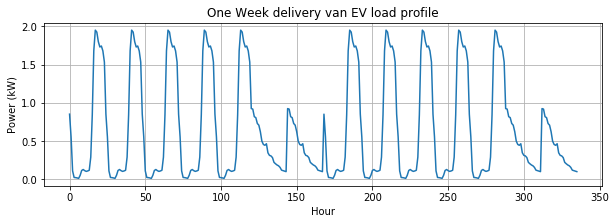

In [39]:
ax = ( pd.Series(one_year)[:24*14].plot(title='One Week delivery van EV load profile',
                   grid=True,
                   figsize=(10,3)) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [40]:
delivery = one_year

# Public

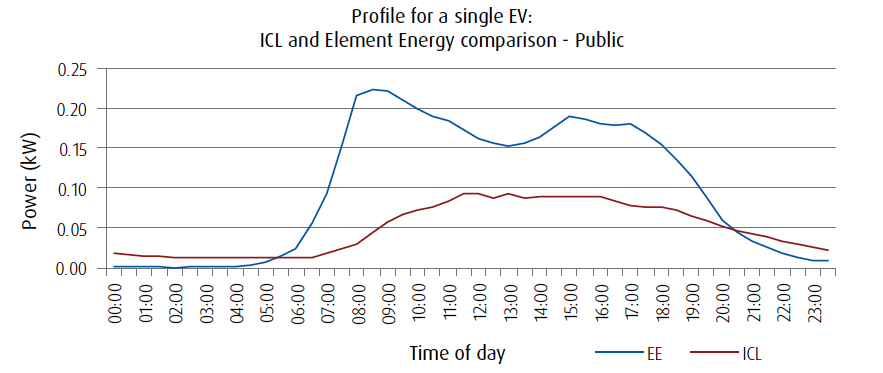

### Extract from plots

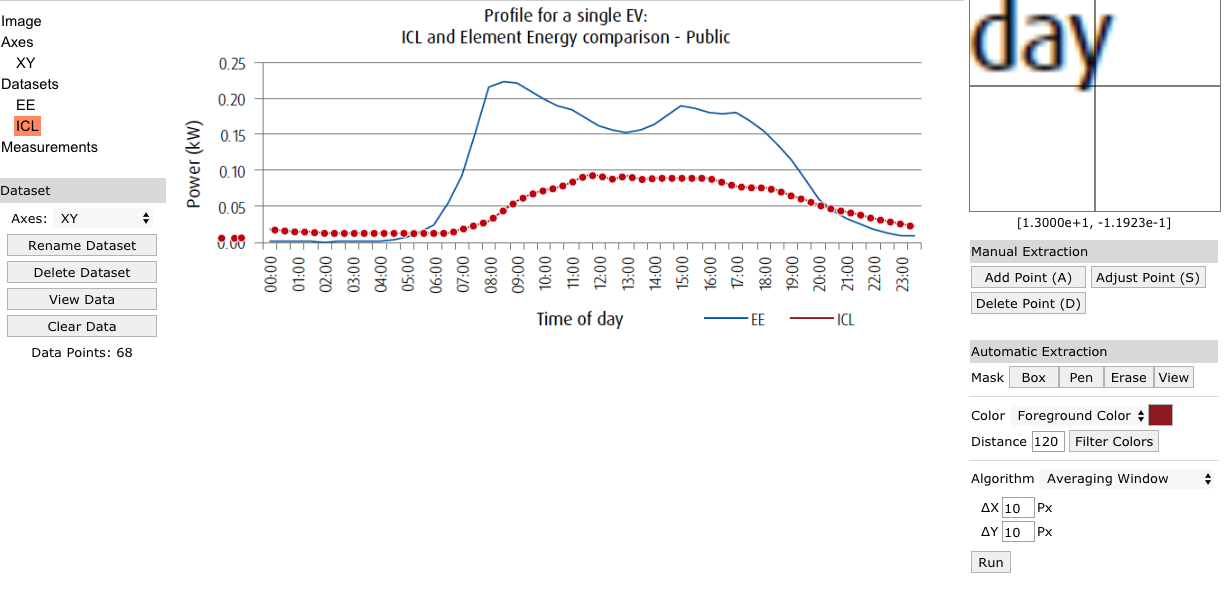

In [41]:
with open('public.json') as json_file:
    data = json.load(json_file)

In [42]:
rv = {}
for dataset in data['datasetColl']:
    name = dataset['name']
    points = []
    for point in dataset['data']:
        points.append(point['value'])
    rv[name] = points

In [43]:
rv.keys()

dict_keys(['EE', 'ICL'])

In [44]:
all_df = []
for name, data in rv.items():
    df = pd.DataFrame(data, columns=['hour', name])
    df = df.set_index('hour')
    df = df[ ~df.index.duplicated() ]
    df =  ( df.reindex(
            df.index.unique().union( range(0,25) ) )
            .interpolate()
            .reindex( range(0,25) , )
          )
    all_df.append(df)
#     df.plot()
#     break

In [45]:
all_df = reduce( lambda df1, df2: pd.merge(
                    df1, df2,
                    left_index=True, right_index=True),
                    all_df )
all_df.head()

,EE,ICL
0,0.001065,0.012807
1,0.002316,0.016309
2,0.001058,0.014168
3,0.002309,0.013594
4,0.002306,0.013592


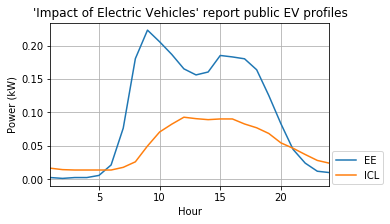

In [46]:
ax = ( all_df.plot(title='\'Impact of Electric Vehicles\' report public EV profiles',
                   grid=True,
                   figsize=(5,3)) )
ax.legend(loc=(1.01, 0.01))
ax.set_xlim( (1,24) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [47]:
all_df = all_df.dropna(how='all')

In [48]:
len(all_df)

25

In [49]:
all_df = all_df[:24]
len(all_df)

24

In [50]:
all_df = all_df.mean(axis='columns')

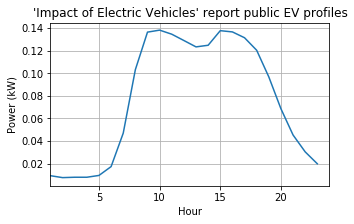

In [51]:
ax = ( all_df.plot(title='\'Impact of Electric Vehicles\' report public EV profiles',
                   grid=True,
                   figsize=(5,3)) )
ax.set_xlim( (1,24) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [52]:
one_year = np.tile(all_df, 52*7)

In [53]:
len(one_year)

8736

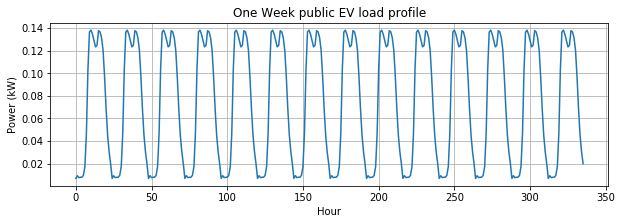

In [54]:
ax = ( pd.Series(one_year)[:24*14].plot(title='One Week public EV load profile',
                   grid=True,
                   figsize=(10,3)) )
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [55]:
public = one_year

# Merge

In [56]:
all_profiles = [domestic, commercial, delivery, public]

In [57]:
df = pd.DataFrame(all_profiles).T
df.columns = ['domestic', 'commercial', 'delivery', 'public']
df.head()

,domestic,commercial,delivery,public
0,0.165638,0.009463,0.852861,0.006936
1,0.111480,0.009931,0.554756,0.009312
2,0.072106,0.009038,0.110974,0.007613
3,0.051975,0.008229,0.024958,0.007952
4,0.065474,0.017055,0.022952,0.007949


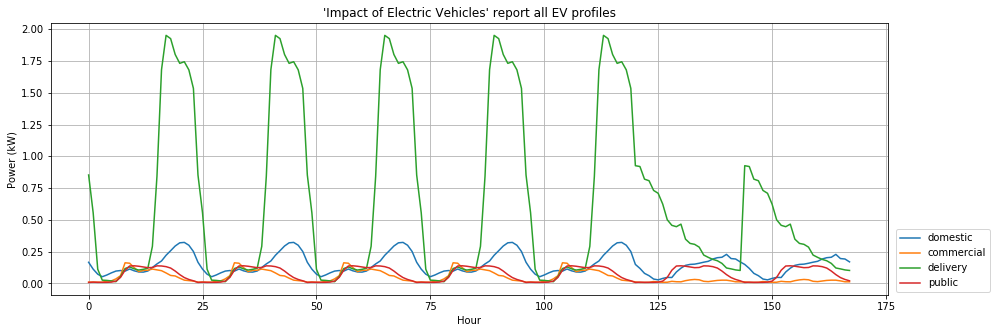

In [58]:
ax = ( df[:7*24].plot(title='\'Impact of Electric Vehicles\' report all EV profiles',
                   grid=True,
                   figsize=(15,5)) )
ax.legend(loc=(1.01, 0.01))
discard = ax.set_xlabel('Hour')
discard = ax.set_ylabel('Power (kW)')

In [59]:
df.to_csv('../cleaned/impact_of_electric_vehicles_profiles.csv')